In [49]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

In [135]:
def likelihood(data,mu,sig):
    n = 1
    ans = ((2*np.pi*sig**2)**(-n/2))*np.e**((-1/(2*sig**2))*((data-mu)**2))
    return ans
    

In [153]:
mean,std = 600,150
timesteps = np.arange(0,2000,1)
data = stats.norm.rvs(mean,std,500)

post,prior,like = np.zeros((data.size,len(timesteps))),np.zeros((data.size,len(timesteps))),np.zeros((data.size,len(timesteps)))
prior[0,:] = stats.uniform.pdf(timesteps,0,2000)
for i,x in enumerate(data):
    
    like[i,:] = likelihood(x,timesteps,75)
    post[i,:] = prior[i,:]*like[i,:]/np.sum(prior[i,:]*like[i,:])
    if i != data.size-1:
        prior[i+1,:] = post[i,:]
    

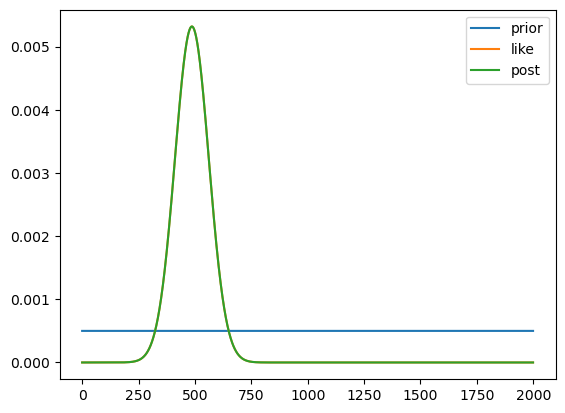

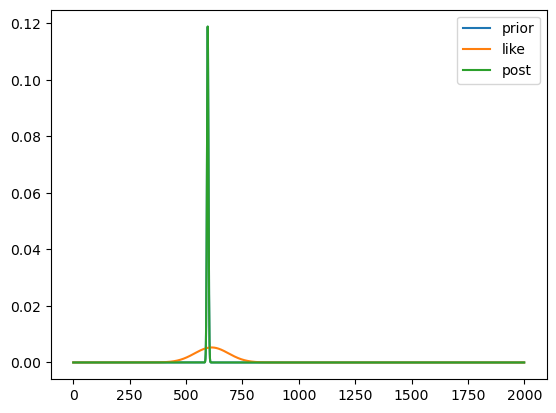

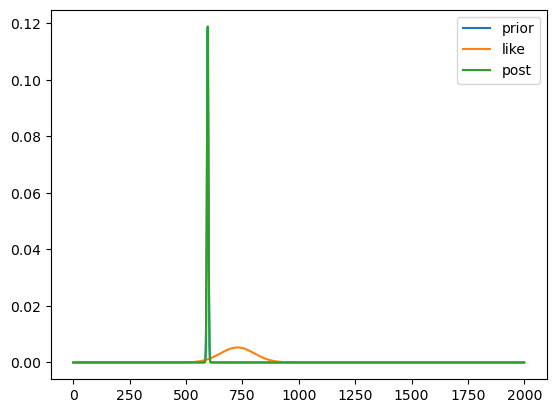

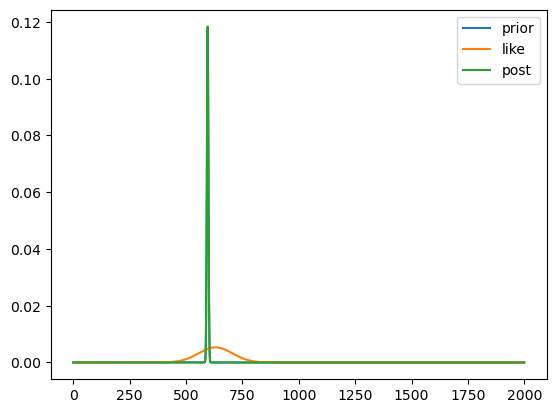

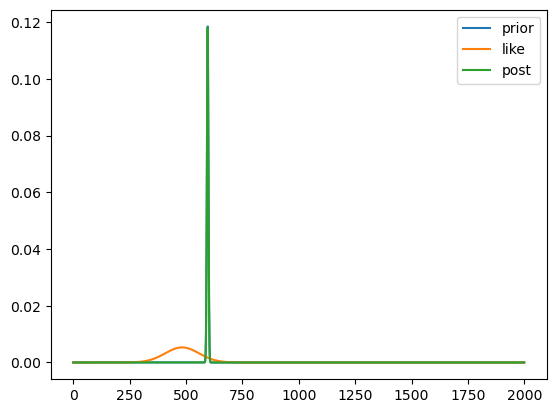

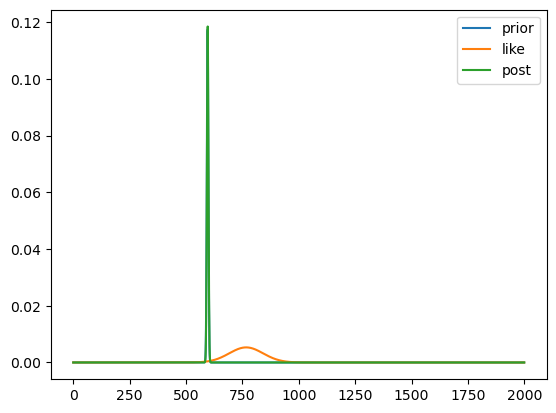

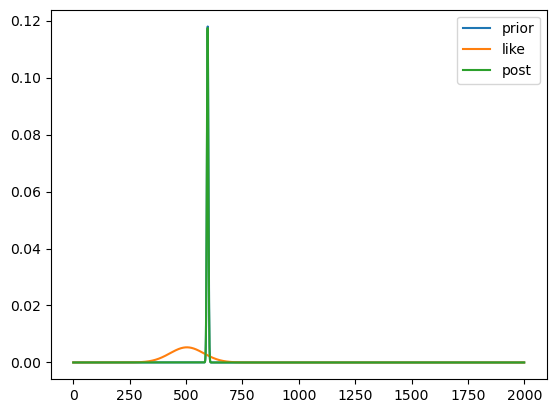

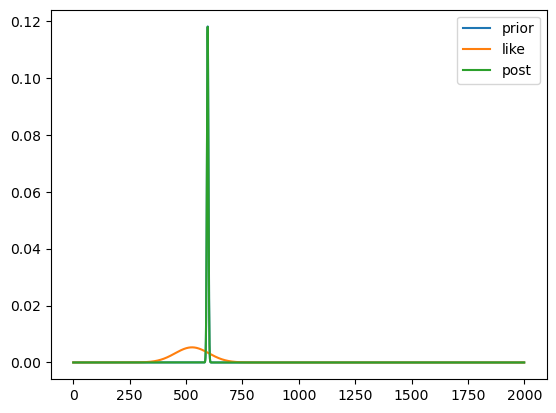

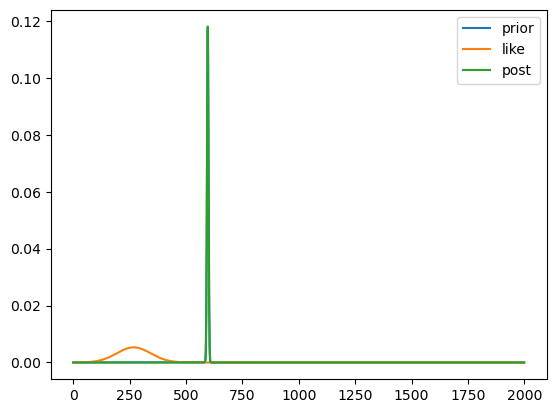

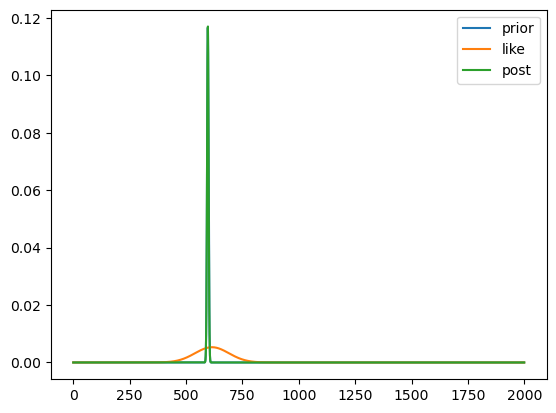

In [154]:
index = np.arange(0,10,1)
for i in index:
    fig,ax = plt.subplots()
    ax.plot(timesteps,prior[-i,:],label='prior')
    ax.plot(timesteps,like[-i,:],label='like')
    ax.plot(timesteps,post[-i,:],label='post')
    ax.legend()
    ax.plot()

In [105]:
like

[]

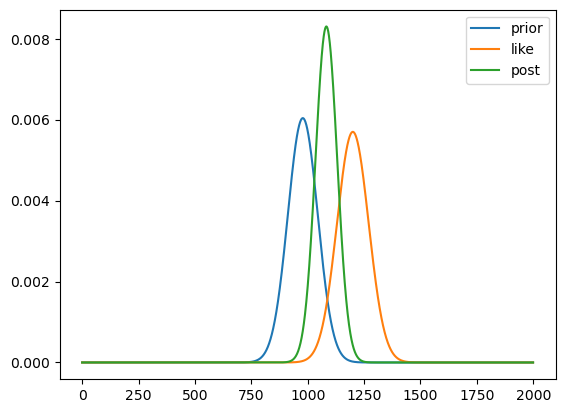

In [138]:
prior = post
like = likelihood(np.array([1200]),timesteps,70)
post = prior*(like)/np.sum(prior*like)
fig,ax = plt.subplots()
ax.plot(timesteps,prior,label='prior')
ax.plot(timesteps,like,label='like')
ax.plot(timesteps,post,label='post')
ax.legend()
ax.plot()